In [1]:
import ydf
import pandas as pd
import numpy as np
from ydf import Task
import plotly.express as px
import seaborn as sns

In [2]:
data = pd.read_csv('zac_region_frij.csv')
train_data = data[['rain','evap','t_max','t_min','month','year']].dropna()


<Axes: >

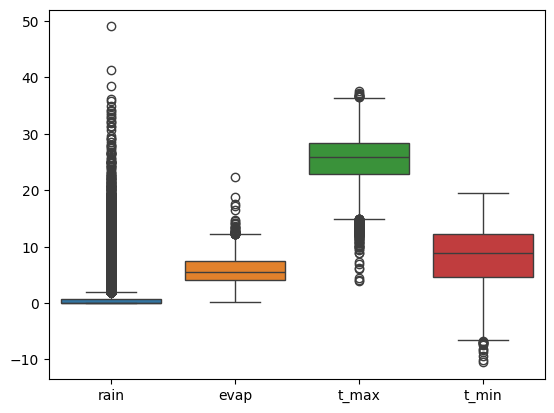

In [3]:
sns.boxplot(train_data[['rain','evap','t_max','t_min']])

<Axes: >

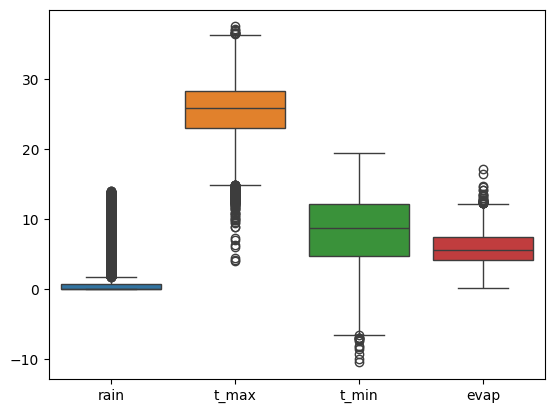

In [4]:
sns.boxplot(train_data[['rain','t_max','t_min','evap']].loc[train_data['rain']<14])

In [5]:
model = ydf.CartLearner(
    label = 'rain', 
    task=Task.REGRESSION
).train(train_data[train_data['rain']<25])

Train model on 30273 examples


Model trained in 0:00:00.143558


In [6]:
model.describe()

In [7]:
model.evaluate(train_data)

Evaluation()

In [8]:
predict_data = pd.read_csv('nieves_to_predict.csv', index_col='date')
predict_data.index = pd.to_datetime(predict_data.index)
real_nieves_data = predict_data.copy()
predict_data.drop(columns=['rain'], inplace=True)
real_nieves_data

,rain,evap,t_max,t_min,month,year
date,,,,,,
1986-11-01,0.00,12.00,22.0,6.0,11,1986
1986-11-02,0.00,17.00,23.0,6.0,11,1986
1986-11-03,0.00,14.00,23.0,9.0,11,1986
1986-11-04,0.00,10.50,23.0,10.0,11,1986
1986-11-05,2.50,11.50,20.0,11.0,11,1986
...,...,...,...,...,...,...
2023-08-27,0.01,3.26,25.0,16.0,8,2023
2023-08-28,0.01,5.20,29.5,11.5,8,2023
2023-08-29,0.00,7.30,32.0,11.5,8,2023


In [9]:
prediction = model.predict(predict_data)
prediction

array([0.15146732, 0.15146732, 1.1510016 , ..., 0.7942574 , 5.5714045 ,
       5.5714045 ], dtype=float32)

In [10]:
prediction = pd.Series(prediction)
prediction.index = predict_data.index
prediction

date
1986-11-01    0.151467
1986-11-02    0.151467
1986-11-03    1.151002
1986-11-04    2.080953
1986-11-05    2.080953
                ...   
2023-08-27    9.342689
2023-08-28    3.066367
2023-08-29    0.794257
2023-08-30    5.571404
2023-08-31    5.571404
Length: 10080, dtype: float32

In [11]:
predict_data['rain-P'] = prediction
predict_data['rain-P']

date
1986-11-01    0.151467
1986-11-02    0.151467
1986-11-03    1.151002
1986-11-04    2.080953
1986-11-05    2.080953
                ...   
2023-08-27    9.342689
2023-08-28    3.066367
2023-08-29    0.794257
2023-08-30    5.571404
2023-08-31    5.571404
Name: rain-P, Length: 10080, dtype: float32

In [12]:
real_nieves_data['rain']

date
1986-11-01     0.00
1986-11-02     0.00
1986-11-03     0.00
1986-11-04     0.00
1986-11-05     2.50
              ...  
2023-08-27     0.01
2023-08-28     0.01
2023-08-29     0.00
2023-08-30    23.00
2023-08-31     0.00
Name: rain, Length: 10080, dtype: float64

In [13]:
compare_data = pd.DataFrame()
compare_data['real'] = real_nieves_data['rain']
compare_data['predicted'] = predict_data['rain-P']
compare_data['t_min'] = real_nieves_data['t_min']
compare_data['t_max'] = real_nieves_data['t_max']
compare_data['evap'] = real_nieves_data['evap']

In [14]:
px.line(compare_data)


In [15]:
compare_data.describe()

,real,predicted,t_min,t_max,evap
count,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000
mean,1.206537,1.138567,7.622590,27.390874,6.185092
std,5.272774,2.117397,5.504045,4.477955,2.813821
min,0.000000,0.000000,-10.000000,-7.500000,0.100000
25%,0.000000,0.020575,3.500000,25.000000,4.100000
50%,0.000000,0.150000,8.000000,28.000000,5.810000
75%,0.010000,1.327850,12.500000,30.500000,8.100000
max,145.600000,16.225067,20.000000,39.000000,18.000000


<Axes: ylabel='Count'>

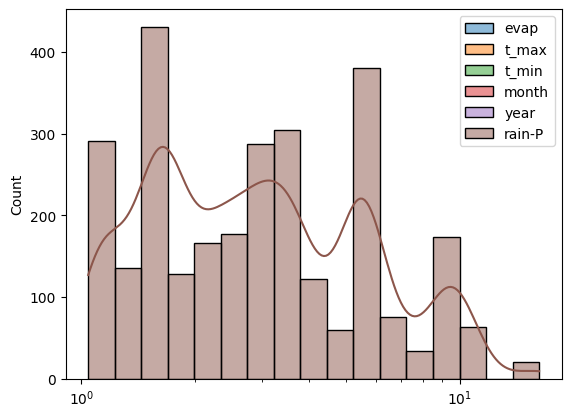

In [16]:
sns.histplot(predict_data[predict_data[['rain-P']]>1], kde=True, log_scale=True)

In [17]:
predict_data.groupby('month')[['rain-P','evap','t_max','t_min']].agg('mean')

,rain-P,evap,t_max,t_min
month,,,,
1,0.414373,4.026208,22.229306,0.673210
2,0.334767,5.478588,24.651955,2.590593
3,0.301147,7.468876,27.364472,4.610216
4,0.358976,8.855401,30.190012,7.374913
5,0.760549,9.300750,32.264784,10.933068
6,1.671463,8.047156,31.250466,13.537413
7,2.492295,6.572302,29.403776,13.564945
8,2.508788,6.086996,29.266196,13.108363
9,2.919135,5.003329,27.272613,11.963317


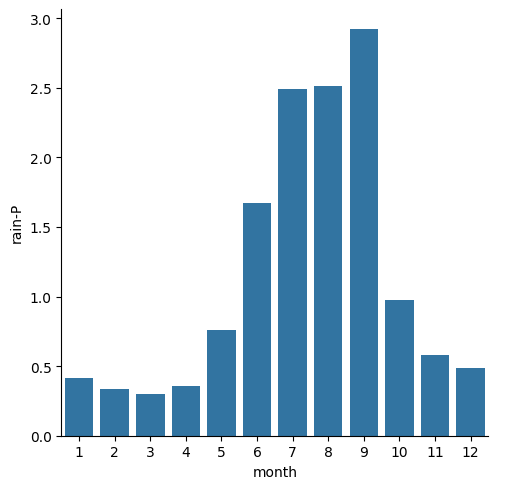

In [18]:
sns.catplot(predict_data.groupby('month')[['rain-P']].agg('mean'), kind='bar', x='month',y='rain-P')